# **Polynomial Regression**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import itertools
import functools

In [4]:
def get_combinations(x,degree):
  return itertools.combinations_with_replacement(x,degree)

def compute_new_features(items):
  return functools.reduce(lambda x,y:x*y,items)

In [5]:
{items:compute_new_features(items) for items in get_combinations([1],3)}

{(1, 1, 1): 1}

In [6]:
{items:compute_new_features(items) for items in get_combinations([4,5],3)}

{(4, 4, 4): 64, (4, 4, 5): 80, (4, 5, 5): 100, (5, 5, 5): 125}

In [7]:
{items:compute_new_features(items) for items in get_combinations([1,4],4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [8]:
import numpy as np

def polynomial_transform(x,degree,logging=False):
  if x.ndim==1:
    x=x[:,None]
  x_t=x.transpose()
  features=[np.ones(len(x))]

  if logging:
    print("input: ",x)
  for degree in range(1, degree+1):
    for items in get_combinations(x_t,degree):
      features.append(compute_new_features(items))
      if logging:
        print(items,':',compute_new_features(items))
  if logging:
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()

In [9]:
polynomial_transform(np.array([[1],[5],[2]]),2)

array([[ 1.,  1.,  1.],
       [ 1.,  5., 25.],
       [ 1.,  2.,  4.]])

In [10]:
polynomial_transform(np.array([3,5,6,8,2]),4,logging=False)

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [11]:
polynomial_transform(np.array([3,2]),3,logging=True)

input:  [[3]
 [2]]
(array([3, 2]),) : [3 2]
(array([3, 2]), array([3, 2])) : [9 4]
(array([3, 2]), array([3, 2]), array([3, 2])) : [27  8]
[[ 1.  3.  9. 27.]
 [ 1.  2.  4.  8.]]


array([[ 1.,  3.,  9., 27.],
       [ 1.,  2.,  4.,  8.]])

# Non linear Training Data Generation

In [12]:
def create_nonlin_training_set(func,sample_size,std):
  x=np.linspace(0,1,sample_size)
  y=func(x)+np.random.normal(scale=std,size=x.shape)
  return x,y

def nonlin(x):
  return np.sin(2*np.pi*x)

In [13]:
def visualize_training_data(X_train, y_train):
  points=np.linspace(0,1,100)
  output=nonlin(points)

  plt.scatterplot(X_train,y_train,facecolor="none",s=50,label="training data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")
  plt.xlabel("$x_1$")
  plt.ylabel('y')
  plt.legend()
  plt.show()

def visualize_model_fit(X,y,lin_reg,degree):
  points=np.linspace(0,1,100)
  output=nonlin(points)
  if degree>0:
    plt.scatterplot(X,y, facecolor="none",edgecolor="b",s=50,label="training_data")
  plt.plot(points,output,c="g",label="$\sin(2\pi x)$")
  # y_hat=lin_reg.predict(polynomial_transform(points,degree))

In [14]:
X=np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6],[5,6,7],[6,7,8],[9,0,5],[8,5,3],[8,3,5],[9,3,0]])
X

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 8],
       [9, 0, 5],
       [8, 5, 3],
       [8, 3, 5],
       [9, 3, 0]])

In [15]:
y=np.array([[9],[2],[7],[3],[2],[30],[7],[1],[5],[11]])
y

array([[ 9],
       [ 2],
       [ 7],
       [ 3],
       [ 2],
       [30],
       [ 7],
       [ 1],
       [ 5],
       [11]])

In [16]:
X.shape

(10, 3)

In [17]:
w=np.array([[4],[3],[11],[7]])
w

array([[ 4],
       [ 3],
       [11],
       [ 7]])

In [18]:
w.shape

(4, 1)

In [19]:
import numpy as np
import random
from sklearn.preprocessing import add_dummy_feature

def ridge_loss(X, y, w, l):
  Xdummy=add_dummy_feature(X)
  p1=(Xdummy @ w)-y
  p1t=np.transpose(p1)
  wt=np.transpose(w)
  p2=(l/2)*(wt @ w)
  return ((0.5*p1t @ p1 )+ p2)

In [20]:
ridge_loss(X,y,w,0.5)

array([[42046.75]])

In [21]:
X=np.array([0.   ,      0.02040816 ,0.04081633 ,0.06122449 ,0.08163265 ,0.10204082,
 0.12244898, 0.14285714, 0.16326531, 0.18367347, 0.20408163, 0.2244898,
 0.24489796, 0.26530612, 0.28571429, 0.30612245, 0.32653061, 0.34693878,
 0.36734694, 0.3877551 , 0.40816327, 0.42857143, 0.44897959, 0.46938776,
 0.48979592, 0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
 0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755, 0.71428571,
 0.73469388, 0.75510204, 0.7755102 , 0.79591837, 0.81632653, 0.83673469,
 0.85714286, 0.87755102, 0.89795918, 0.91836735, 0.93877551 ,0.95918367,
 0.97959184, 1.        ])

In [22]:
X

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [23]:
X.reshape(1,-1)

array([[0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]])

In [24]:
a=np.zeros(10)
b=np.ones(10)
c=np.column_stack((a,b))
c=c.reshape(-1,1)
c.shape

(20, 1)

In [25]:
d=np.ones(20)
e=np.column_stack((d,d,d))

In [26]:
e.shape

(20, 3)

In [27]:
f=np.column_stack((e,c))

In [28]:
import numpy as np

# Creates a numpy array of shape (4,5), filled with random integers between 0 (inclusive) and 10 (exclusive)
X= np.random.randint(0,10,(20,3)) 
y= np.random.randint(0,10,(20,1)) 
w= np.random.randint(0,10,(3,1)) 

In [29]:
from sklearn.preprocessing  import add_dummy_feature

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg=LinearRegression()

In [32]:
lin_reg.fit(X,y)

LinearRegression()

In [33]:
y_pred=lin_reg.predict(X)

In [34]:
y_pred

array([[5.51873202],
       [4.45883256],
       [5.33430271],
       [4.42204908],
       [4.71189746],
       [4.51099637],
       [5.6674693 ],
       [4.80847092],
       [5.26701453],
       [6.26760573],
       [4.6145863 ],
       [3.11043213],
       [5.60066285],
       [4.07363014],
       [5.90454415],
       [5.13401133],
       [3.61460481],
       [3.93312876],
       [6.1939108 ],
       [5.85311804]])

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

2.3588689720041374

In [36]:
X

array([[6, 5, 2],
       [9, 7, 9],
       [4, 1, 5],
       [3, 7, 4],
       [2, 2, 6],
       [6, 6, 7],
       [5, 2, 3],
       [4, 0, 9],
       [2, 5, 0],
       [8, 1, 3],
       [9, 6, 9],
       [2, 9, 9],
       [8, 2, 6],
       [4, 8, 6],
       [9, 1, 6],
       [6, 2, 7],
       [1, 7, 7],
       [2, 7, 6],
       [3, 0, 0],
       [3, 0, 2]])

In [37]:
w

array([[8],
       [9],
       [7]])

In [38]:
yp=X@w

In [39]:
mean_absolute_error(y, yp)

105.65

In [40]:
import matplotlib.pyplot as plt

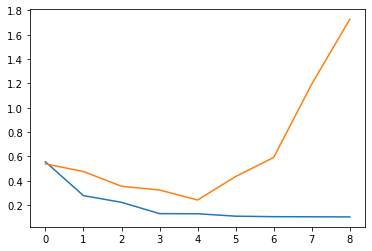

In [41]:
plt.plot([0,1,2,3,4,5,6,7,8],[0.555,0.277,0.222,0.129,0.128,0.108,0.104,0.103,0.102],
             [0,1,2,3,4,5,6,7,8],[0.538,.475,.354,.323,.241,.434,.591,1.194,1.727] )

In [42]:
X=np.array([[1.1,1.2],[2.3,1.5],[2.9,2.3]])
y=np.array([1,0.6,1.2])
y=y.reshape(-1,1)

In [43]:
X

array([[1.1, 1.2],
       [2.3, 1.5],
       [2.9, 2.3]])

In [44]:
y

array([[1. ],
       [0.6],
       [1.2]])

In [45]:
wr=np.array([[0.5],[-0.5]])

In [46]:
wr

array([[ 0.5],
       [-0.5]])

In [47]:
wl=np.array([[1],[-0.3]])
wl

array([[ 1. ],
       [-0.3]])

In [48]:
p1=X@wr-y

In [49]:
p2=np.transpose(wr)@wr

In [50]:
rloss=0.5*np.transpose(p1)@p1+((0.01/2)*p2)

In [51]:
rloss

array([[0.97875]])

In [52]:
l1=X@wl-y
l2=np.transpose(wl)@wl
lloss=0.5*np.transpose(l1)@l1+((0.01/2)*l2)
lloss

array([[1.33055]])

In [53]:
lossss=((np.transpose(X)@X@wr)-(np.transpose(X)@y)+0.01*wr)

In [54]:
lossss

array([[-4.22 ],
       [-3.635]])

In [55]:
from sklearn.linear_model import Ridge
import numpy as np

clf = Ridge(alpha=0.01)
clf.fit(X, y)
clf.score(X,y)

0.9907981688023165

In [56]:
X,y=create_nonlin_training_set(nonlin,50,0.1)

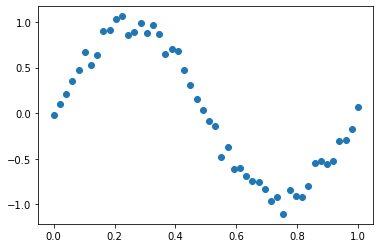

In [57]:
plt.scatter(X,y)

In [58]:
X,y=create_nonlin_training_set(nonlin,50,0.05)

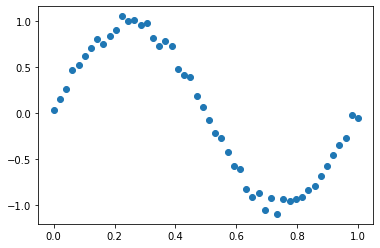

In [59]:
plt.scatter(X,y)

In [106]:
X,y=create_nonlin_training_set(nonlin,50,0.01)

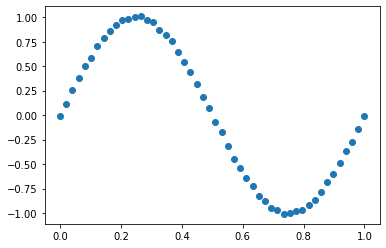

In [107]:
plt.scatter(X,y)

In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=9, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_reg_model = Ridge(alpha=10)
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)


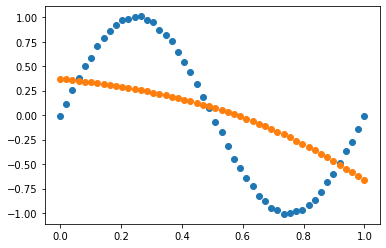

In [115]:
plt.scatter(X,y)
plt.scatter(X,y_predicted)
plt.show()

In [89]:
X=np.array([[1,2,3],[3,2,4]])
y=np.array([[2],[4]])

l=0.1
w=np.array([[1],[0.01],[-0.5],[0]])

X=add_dummy_feature(X)

l1=X@w-y
l2=1+(0.1**2)+(0.2**2)+(0.3**2)
loss=(0.5 * (np.transpose(l1)@l1))+((l/2)*l2)
loss

array([[9.9175]])

In [85]:
loss

array([[1.942]])